In [6]:
# 데이터 분석 모듈 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 데이터 준비

paths1 = "../data-files/population-in-seoul.xlsx"
paths2 = "../data-files/seoul-crime.xlsx"

# pop_in_seoul_excel = pd.read_excel(paths, header=None)
pop_in_seoul_excel = pd.read_excel(paths1)
seoul_crime_excel = pd.read_excel(paths2)

c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
years = [year for year in range(2014,2025)]


pop_in_seoul = pop_in_seoul_excel.copy() 

# 행, 열 삭제
pop_in_seoul.drop([0,1], axis=0, inplace=True)
pop_in_seoul.drop(pop_in_seoul.columns[0], axis=1, inplace=True)
pop_in_seoul.drop(pop_in_seoul.columns[1:5], axis=1, inplace=True) # - 2024 4/4분기 삭제

#인덱스 지정
pop_in_seoul.rename(columns={pop_in_seoul.columns[0]:"자치구"}, inplace=True)
pop_in_seoul.set_index("자치구", inplace=True)

# 컬럼 지정
new_columns = []
l1 = ["계", "한국인", "외국인", "고령자"]
for year in years:
    for v in l1:
        new_columns.append(str(year)+v)
pop_in_seoul.columns = new_columns

# 타입 변경
pop_in_seoul.astype(int)

pop_in_seoul.head()

,2014계,2014한국인,2014외국인,2014고령자,2015계,2015한국인,2015외국인,2015고령자,2016계,2016한국인,...,2022외국인,2022고령자,2023계,2023한국인,2023외국인,2023고령자,2024계,2024한국인,2024외국인,2024고령자
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,165344,156993,8351,24537,163822,154986,8836,24892,161922,152737,...,10832,27958,150453,139417,11036,28764,149608,138336,11272,29840
중구,136227,128065,8162,19960,134329,125733,8596,20302,134409,125249,...,10348,25055,131793,121312,10481,25920,131214,120544,10670,26853
용산구,249914,235951,13963,34896,247909,233342,14567,35715,245102,230241,...,14634,39037,227106,213151,13955,39747,217194,203854,13340,39407
성동구,303891,296086,7805,36684,305065,297003,8062,38164,307161,299259,...,7234,47720,284766,277361,7405,49462,281289,273669,7620,51245
광진구,377375,363354,14021,38974,375180,360369,14811,40368,372104,357215,...,13836,54071,351180,335554,15626,56819,348652,331963,16689,59743


In [11]:
seoul_crime = seoul_crime_excel.copy()
seoul_crime.drop([0,1,2,3], axis=0, inplace=True)
seoul_crime.drop(seoul_crime_excel.columns[:1], axis=1, inplace=True)

# 컬럼명 변경
clms = seoul_crime.columns
crimeList = ["합계", "살인", "강도", "강간", "절도", "폭력"]

seoul_crime.rename(columns={clms[0]:"자치구"}, inplace=True)

i = 1
for j in range(2014,2024):
    for k in crimeList:
        seoul_crime.rename(columns={clms[i]:str(j)+"발생"+k}, inplace=True)
        seoul_crime.rename(columns={clms[i+1]:str(j)+"검거"+k}, inplace=True)
        i += 2

# 인덱스 변경 
seoul_crime.set_index("자치구", inplace=True)

# 형변환
seoul_crime.replace('-', '0',inplace=True)
seoul_crime = seoul_crime.astype(int)


print(seoul_crime.info())
seoul_crime.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Columns: 120 entries, 2014발생합계 to 2023검거폭력
dtypes: int64(120)
memory usage: 23.6+ KB
None


,2014발생합계,2014검거합계,2014발생살인,2014검거살인,2014발생강도,2014검거강도,2014발생강간,2014검거강간,2014발생절도,2014검거절도,...,2023발생살인,2023검거살인,2023발생강도,2023검거강도,2023발생강간,2023검거강간,2023발생절도,2023검거절도,2023발생폭력,2023검거폭력
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,5021,4610,3,7,12,15,226,948,2272,1281,...,5,6,5,7,239,1138,1169,953,1563,1381
중구,5231,3188,6,5,13,13,221,161,2576,887,...,3,3,6,5,212,144,1520,864,1607,1449
용산구,3799,2340,1,2,7,7,213,169,1560,522,...,3,4,3,3,245,219,978,561,1792,1481
성동구,3582,2048,1,1,5,6,141,103,1753,529,...,2,1,2,2,119,85,893,472,1007,851
광진구,6268,3531,8,9,16,22,249,199,3167,1001,...,2,2,5,3,238,178,1616,830,1563,1320


In [24]:
# 데이터 병합 

merge_df = pop_in_seoul.iloc[:, -8:-4].merge(seoul_crime.iloc[:, -12:], on=["자치구"], how="inner")
merge_df["검거율"] = merge_df["2023검거합계"] / merge_df["2023발생합계"]
merge_df[["2023계", "2023발생합계"]].sort_values("2023계")

,2023계,2023발생합계
자치구,,
중구,131793,3348
종로구,150453,2981
용산구,227106,3021
금천구,241105,2240
성동구,284766,2023
강북구,292977,2497
도봉구,309494,1921
서대문구,320629,2385
광진구,351180,3424


c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missin

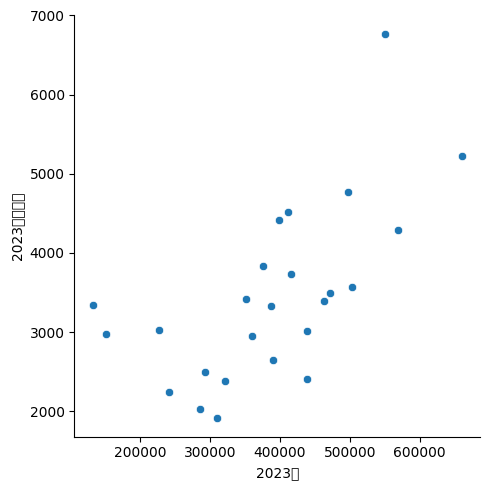

In [22]:
# 자치구, 2023년 발생소계, 검거소계, 2023계 컬럼의 데이터를 사용해서
# 인구와 범죄 발생 건수를 비교

sns.relplot(x="2023계", y="2023발생합계", data=merge_df)